In [1]:
# Loading the required packages to run this notebook
import src.utils.utils as utils
import matplotlib.pyplot as plt
import matplotlib.style as style
import pandas as pd
import seaborn as sns
from pathlib import Path

# Use seaborn style defaults and set the default figure size
fig_size = (12, 8)
sns.set(rc={"figure.figsize": fig_size})
sns.set_theme(style="whitegrid")
sns.set_context("paper", rc={"lines.linewidth": 3.0})
style.use("seaborn-colorblind")
sns.set_style("ticks")

# Setup the correct foldure structure
project_dir = Path().resolve().parents[1]
model_dir = project_dir / "models" / "saved-models"
model_intermediate_dir = model_dir / "intermediate"

In [20]:
data_processed = "RegionBornholm_01062019_30092019_CargTank_14400_86400_600"

# Define a function to read in the training/validation curves for a specified setup
def curves_df(setup_type, data_processed, model="VRNN", latent_dim="100", 
              recurrent_dim="100", batch_norm=False, scheduler=False, kl_annealing=False):
    # Figure out the .csv file name for the current model setup
    BatchNorm = "_batchNormTrue" if batch_norm else "_batchNormFalse"
    Scheduler = "_SchedulerTrue" if scheduler else ""
    KLAnneal = "_KLTrue" if kl_annealing else ""
    curves_file = (
        model
        + "_"
        + data_processed
        + "_latent"
        + latent_dim
        + "_recurrent"
        + recurrent_dim
        + BatchNorm
        + Scheduler
        + KLAnneal
        + "_curves.csv"
    )
    
    # Read in the training/validation learning curves for the current setup
    df = pd.read_csv(model_dir / curves_file)
    df_train = df.iloc[:, 0:3].copy()
    df_train.columns = ["Loss", "KL divergence", "Reconstruction log probabilities"]
    df_train["Data set type"] = "Training"
    df_train["Epoch"] = df_train.index + 1

    df_val = df.iloc[:, 3:6].copy()
    df_val.columns = ["Loss", "KL divergence", "Reconstruction log probabilities"]
    df_val["Data set type"] = "Validation"
    df_val["Epoch"] = df_train.index + 1
    df = pd.concat([df_train, df_val])
    df["Setup type"] = setup_type
    df.reset_index(drop=True, inplace=True)
    return df

In [21]:
df_Default

,Loss,KL divergence,Reconstruction log probabilities,Data set type,Epoch,Setup type
0,33.886913,0.239712,-33.647201,Training,1,Default
1,20.868617,0.013434,-20.855184,Training,2,Default
2,19.813293,0.017564,-19.795729,Training,3,Default
3,18.426975,0.017292,-18.409683,Training,4,Default
4,16.362271,0.017887,-16.344384,Training,5,Default
...,...,...,...,...,...,...
95,5.564950,0.034624,-5.530326,Validation,46,Default
96,5.564885,0.036163,-5.528722,Validation,47,Default
97,5.532162,0.034809,-5.497352,Validation,48,Default
98,5.516195,0.035888,-5.480307,Validation,49,Default


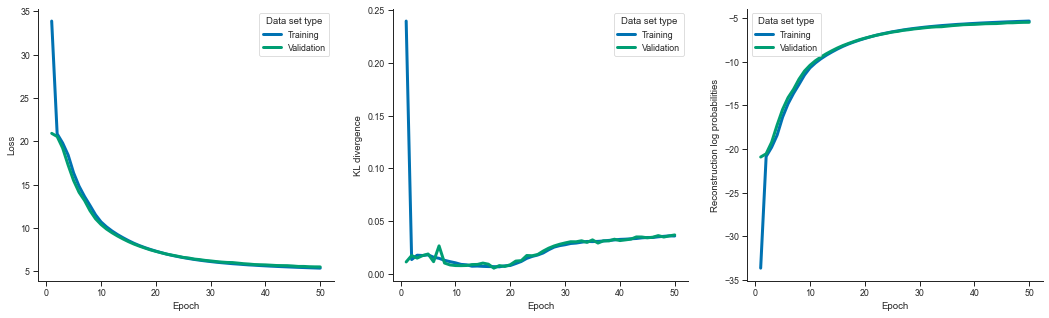

In [49]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
sns.lineplot(x="Epoch", y="Loss", hue="Data set type", hue_order=hue_order, data=df_Default, ax=ax[0])
sns.lineplot(x="Epoch", y="KL divergence", hue="Data set type", hue_order=hue_order, data=df_Default, ax=ax[1])
sns.lineplot(x="Epoch", y="Reconstruction log probabilities", hue="Data set type", hue_order=hue_order, data=df_Default, ax=ax[2])
sns.despine()
plt.show()

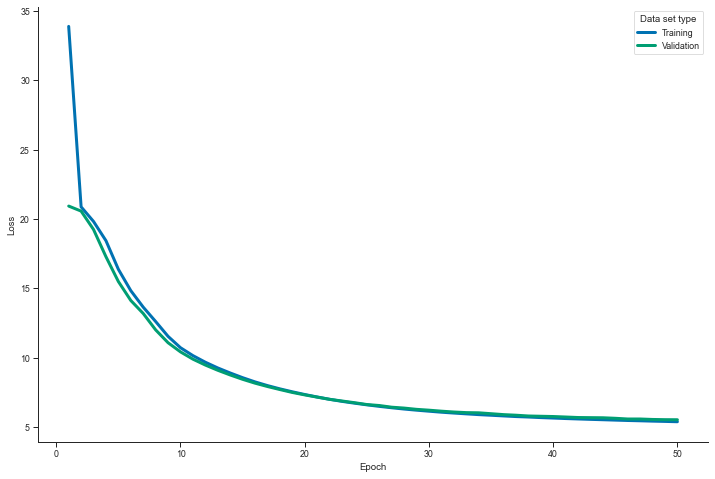

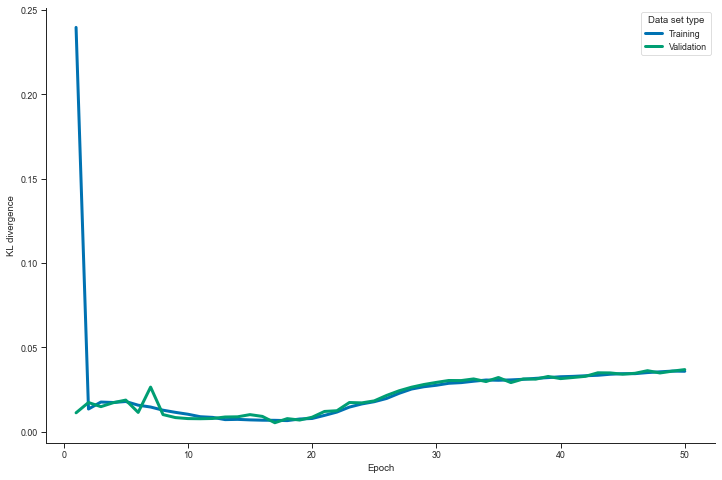

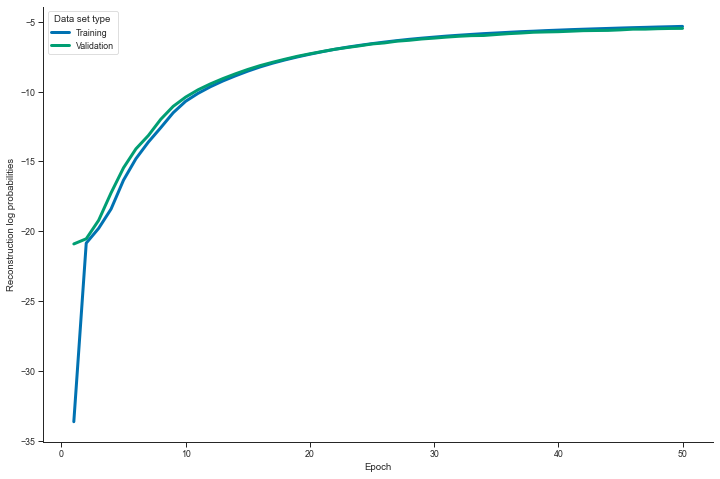

In [46]:
df_Default = curves_df("Default", data_processed)
hue_order = ["Training", "Validation"]

# Training and validation loss
plt.figure()
ax = sns.lineplot(x="Epoch", y="Loss", hue="Data set type", hue_order=hue_order, data=df_Default)
sns.despine()

# Training and validation Kullback–Leibler divergence
plt.figure()
ax = sns.lineplot(x="Epoch", y="KL divergence", hue="Data set type", hue_order=hue_order, data=df_Default)
sns.despine()

# Training and validation Reconstruction log probabilities
plt.figure()
ax = sns.lineplot(x="Epoch", y="Reconstruction log probabilities", hue="Data set type", hue_order=hue_order, data=df_Default)
sns.despine()